In [2]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

from pandas import *

from arcgis.features import *
from arcgis.geometry import *

# Set the DataFram in pandas to show all columns and 500 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

2021-11-03 17:17:10.650767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-03 17:17:10.651103: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load Data

In [3]:
#connect to arcGIS online
gis = GIS('https://a-t-s.maps.arcgis.com', '##############', '##########')

#get by direct ID
poly_FS = gis.content.get('30a48843bbf54bb99cb9a5641534d0da')
NNIP_active_mapping_FS = gis.content.get('64b66d41fea54f519648c2f848fc2a3b')
habitat_FS = gis.content.get('d54c5b4253184947822b1ea8f920f983')

# Merge Polygons with NNIP Mapping data

In [6]:
# temporary bug fix: when running this cell, add 1 to the end of the output file name to make a unique string, i.e. 'SAC_NNIP_Polygon_Point_Join6'

arcgis.features.analysis.join_features(polygons, points, spatial_relationship='intersects', join_operation='JoinOneToMany', output_name='SAC_NNIP_Polygon_Point_Join5')

<Item title:"SAC_NNIP_Polygon_Point_Join5" type:Feature Layer Collection owner:Anooshi>

# Load Polygon Point Join, remove mismatched polygons

In [8]:
#get by direct ID
poly_point_join_FS = gis.content.get('92acb84ec68140579a53e30df92a9280') # this should be updated when cell #6 is rerun. It is the final section of the url for 'SAC_NNIP_Polygon_Point_Join#'

#Convert to dataframe
poly_point_join_DF = poly_point_join_FS.layers[0].query().sdf


In [9]:
#Rename columns
poly_point_join_DF = poly_point_join_DF.rename(columns={'JOIN_FID':'Polygon_ObjectID','GlobalID':'Polygon_GlobalID','Species_Sci':'Polygon_Species_Sci','Species_Sci_1':'Point_Species_Sci','Cover':'Point_Cover','Observation_Date_1':'Mapping_Observation_Date'})

In [10]:
#Entries where the polygon species does not match the point species
reject_IDs = poly_point_join_DF.loc[poly_point_join_DF.Polygon_Species_Sci != poly_point_join_DF.Point_Species_Sci,'OBJECTID']

In [11]:
#Format delete string
delete_string = str(list(reject_IDs))[1:-1]
delete_string

'11, 14, 18, 19, 29, 32, 37, 38, 39, 41, 42, 43, 44, 45, 49, 50, 51, 52, 53, 55, 62, 64, 68, 70, 73, 75, 77, 89, 93, 94, 106, 108, 110, 114, 125, 142, 161, 163, 225, 279, 287, 298, 321, 325, 369, 383, 393, 407, 414, 417, 422, 425, 426, 427, 429, 435, 442, 476, 488, 496, 502, 512, 514, 518, 519, 522, 524, 526, 527, 528, 531, 542, 548, 557, 559, 566, 573, 574, 586, 587, 608, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 661, 677, 680, 694, 741, 771, 773, 775, 777, 784, 785, 793, 800, 809, 822, 827, 829'

In [12]:
#Delete features where polygon species does not match point species
poly_point_join_FS.layers[0].delete_features(deletes=delete_string)

{'deleteResults': [{'objectId': 11,
   'uniqueId': 11,
   'globalId': None,
   'success': True},
  {'objectId': 14, 'uniqueId': 14, 'globalId': None, 'success': True},
  {'objectId': 18, 'uniqueId': 18, 'globalId': None, 'success': True},
  {'objectId': 19, 'uniqueId': 19, 'globalId': None, 'success': True},
  {'objectId': 29, 'uniqueId': 29, 'globalId': None, 'success': True},
  {'objectId': 32, 'uniqueId': 32, 'globalId': None, 'success': True},
  {'objectId': 37, 'uniqueId': 37, 'globalId': None, 'success': True},
  {'objectId': 38, 'uniqueId': 38, 'globalId': None, 'success': True},
  {'objectId': 39, 'uniqueId': 39, 'globalId': None, 'success': True},
  {'objectId': 41, 'uniqueId': 41, 'globalId': None, 'success': True},
  {'objectId': 42, 'uniqueId': 42, 'globalId': None, 'success': True},
  {'objectId': 43, 'uniqueId': 43, 'globalId': None, 'success': True},
  {'objectId': 44, 'uniqueId': 44, 'globalId': None, 'success': True},
  {'objectId': 45, 'uniqueId': 45, 'globalId': None

In [13]:
#Reload data, compare
#get by direct ID
poly_point_join_FS = gis.content.get('92acb84ec68140579a53e30df92a9280')

#Convert to dataframes and compare
poly_point_join_DF = poly_point_join_FS.layers[0].query().sdf
print('# of polygons joined to points:',len(poly_point_join_DF))

polygons_DF = polygons.query().sdf
print('# of polygons:',len(polygons_DF))

# of polygons joined to points: 722


# of polygons: 719


In [13]:
poly_point_join_DF.loc[poly_point_join_DF.Ref_to_Points.isna(),:]

In [14]:
#Drop columns
#Dropped 'FID_feature_set' 'Acres' 'Area_m2' 'GlobalID_12' 'Shape__Area_2'\n 'Shape__Length_2' 'AnalysisArea' 'BHR'

#Last input was data = data.drop(columns=['OBJECTID', 'FID_feature_set', 'Join_Count', 'TARGET_FID','GlobalID','GlobalID_1', 'Ref_to_Points','Acres','Area_m2','GlobalID_12','Shape__Area_2', 'Shape__Length_2', 'AnalysisArea','GlobalID_1602871478691','BHR_Site','BHR'])

data = poly_point_join_DF.drop(columns=['OBJECTID', 'Join_Count', 'TARGET_FID','GlobalID','GlobalID_1', 'Ref_to_Points','GlobalID_1602871478691','BHR_Site'])

In [15]:
#Create area column
i = 0
while i < len(data):
    data.loc[i, 'Area_sqft'] = data.SHAPE[i].area
    i += 1

In [16]:
#Area to acres
data['Area_Acres'] = data.Area_sqft / 43560

In [17]:
#Cover midpoint
cover_midpt = {'0-1':.05,'1-25':.12,'0-5':.025,'5-25':.15,'51-75':.635,'50-75':.635,'26-50':.375,'76-100':.876,'25-50':.375,'':None}

In [18]:
#Convert cover bins to midpoint
data['Mapping_Cover_Midpt'] = data.Cover_1602871478691.replace(cover_midpt).astype(float)

In [19]:
#Remove entries with point species does not match polygon, this is a missjoin.
species_match = ((data.Species_Sci == data.Species_Sci_1) | (data.Species_Sci == None))
data = data.loc[species_match,:]

In [20]:
#Data check - should be two entries.
data.loc[data.Observation_Date == '2020-05-22 18:37:03',:]

,JOIN_FID,Observation_Date,Surveyor_1,Surveyor_2,Species_Sci,Comments,Treatment_Status,Species_Sci_1,Cover,Cal_IPC_Rating,Deprecated,Comments_1,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Observation_Date_1,Surveyor_12,Surveyor_23,Phenology,Cover_1602871478691,Pop_Size,Patch_Shape,Int_Dist,Comments_1602871478691,Field_Season,Estimated_Area_sqft,SHAPE,Area_sqft,Area_Acres,Mapping_Cover_Midpt


In [21]:
#NNIP area
data['NNIP_Area_Acres'] = data.Mapping_Cover_Midpt * data.Area_Acres

In [22]:
data.loc[data.Species_Sci == 'Conium maculatum',:]

In [23]:
#Calculate habtiat area

#convert 'Habitat' feature layer to dataframe
habitat_SDF = habitat_FS.layers[0].query().sdf

#Create area column
i = 0
while i < len(habitat_SDF):
    sqft = habitat_SDF.SHAPE[i].area
    habitat_SDF.loc[i, 'Area_sqft'] = sqft
    i += 1
    
#Area to acres
habitat_SDF['Area_Acres'] = habitat_SDF.Area_sqft / 43560   

habitat_areas = habitat_SDF.groupby('pHab').Area_Acres.sum()
habitat_areas

pHab
Central Coast Riparian Scrub      0.429303
Developed                        10.668870
Ephemeral Stream                  0.488558
Intermittent Stream               9.830652
Mixed Riparian Woodland           5.275479
Non-native Grassland            345.620816
Oak Riparian                      5.308198
Oak Savannah                    130.035962
Oak Woodland                     75.585272
Open Water                        1.489329
Potential Stream                  2.493144
Riparian Scrub                    1.457440
Seasonal Wetland                  3.275368
Seep Wetland                      0.038738
Sycamore Riparian                30.501307
Upland Scrub                      9.261535
Wetland Tributary                 1.824066
Willow Riparian                   4.996531
Name: Area_Acres, dtype: float64

In [24]:
# Subset by year
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 279


# QAQC

In [25]:
validate_domains(poly_FS)
validate_domains(NNIP_active_mapping_FS)
validate_domains(habitat_FS)




Table/Layer:  NNIP_Polygons_2020_2021


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Richard Graham-Bruno, , Janel Mayo}"
0,Surveyor_2,"{Richard Graham-Bruno, Janel Mayo}"




Table/Layer:  SAC_NNIP_Active_Mapping


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Jackson Sabol, Ryan Swanson, Janel Mayo, Joy Stewart, Richard Graham-Bruno}"
0,Surveyor_2,"{, Jackson Sabol, Ryan Swanson, Janel Mayo, Joy Stewart, Richard Graham-Bruno}"
0,Cover_1602871478691,"{76-100, Unknown, 26-50, 51-75, 1-25, 0-1}"
0,Pop_Size,{Unknown}
0,Patch_Shape,{}
0,Int_Dist,{Unknown}
0,Field_Season,{}




Table/Layer:  SAC_Habitat_Layer


No Mismatches Found


In [26]:
QAQC_whitespace(poly_point_join_DF, exclude_cols=['Comments_1','Comments_1602871478691', 'Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Ref_to_Points
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Treatment_Status
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID_1602871478691
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ESRIGNSS_RECEIVER
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Int_Dist
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Field_Season
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species_Sci_1
No \xa

,OBJECTID,Surveyor_1
709,815,




Analysis for: Phenology
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_23
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_12
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species_Sci
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


In [27]:
find_blank_entries(data, exclude_cols=['Surveyor_2', 'Comments', 'ESRIGNSS_AVG_H_RMS', 'Surveyor_23', 'ESRIGNSS_H_RMS', 'Estimated_Area_sqft', 'Field_Season', 'Patch_Shape', 'Comments_1602871478691', 'Cover', 'Comments_1', 'ESRIGNSS_RECEIVER', 'Mapping_Cover_Midpt', 'NNIP_Area_Acres'])

No blank Observation_Date_1
No blank Cover_1602871478691
No blank Deprecated
No blank Treatment_Status
No blank Pop_Size
No blank Surveyor_1
No blank Phenology
No blank JOIN_FID
No blank Int_Dist
No blank Area_sqft
No blank Area_Acres
No blank Species_Sci_1
No blank SHAPE
No blank Observation_Date
No blank Surveyor_12
No blank Species_Sci
No blank Cal_IPC_Rating


In [28]:
sub.columns

Index(['JOIN_FID', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'Species_Sci', 'Comments', 'Treatment_Status', 'Species_Sci_1', 'Cover',
       'Cal_IPC_Rating', 'Deprecated', 'Comments_1', 'ESRIGNSS_RECEIVER',
       'ESRIGNSS_H_RMS', 'ESRIGNSS_AVG_H_RMS', 'Observation_Date_1',
       'Surveyor_12', 'Surveyor_23', 'Phenology', 'Cover_1602871478691',
       'Pop_Size', 'Patch_Shape', 'Int_Dist', 'Comments_1602871478691',
       'Field_Season', 'Estimated_Area_sqft', 'SHAPE', 'Area_sqft',
       'Area_Acres', 'Mapping_Cover_Midpt', 'NNIP_Area_Acres'],
      dtype='object')

/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


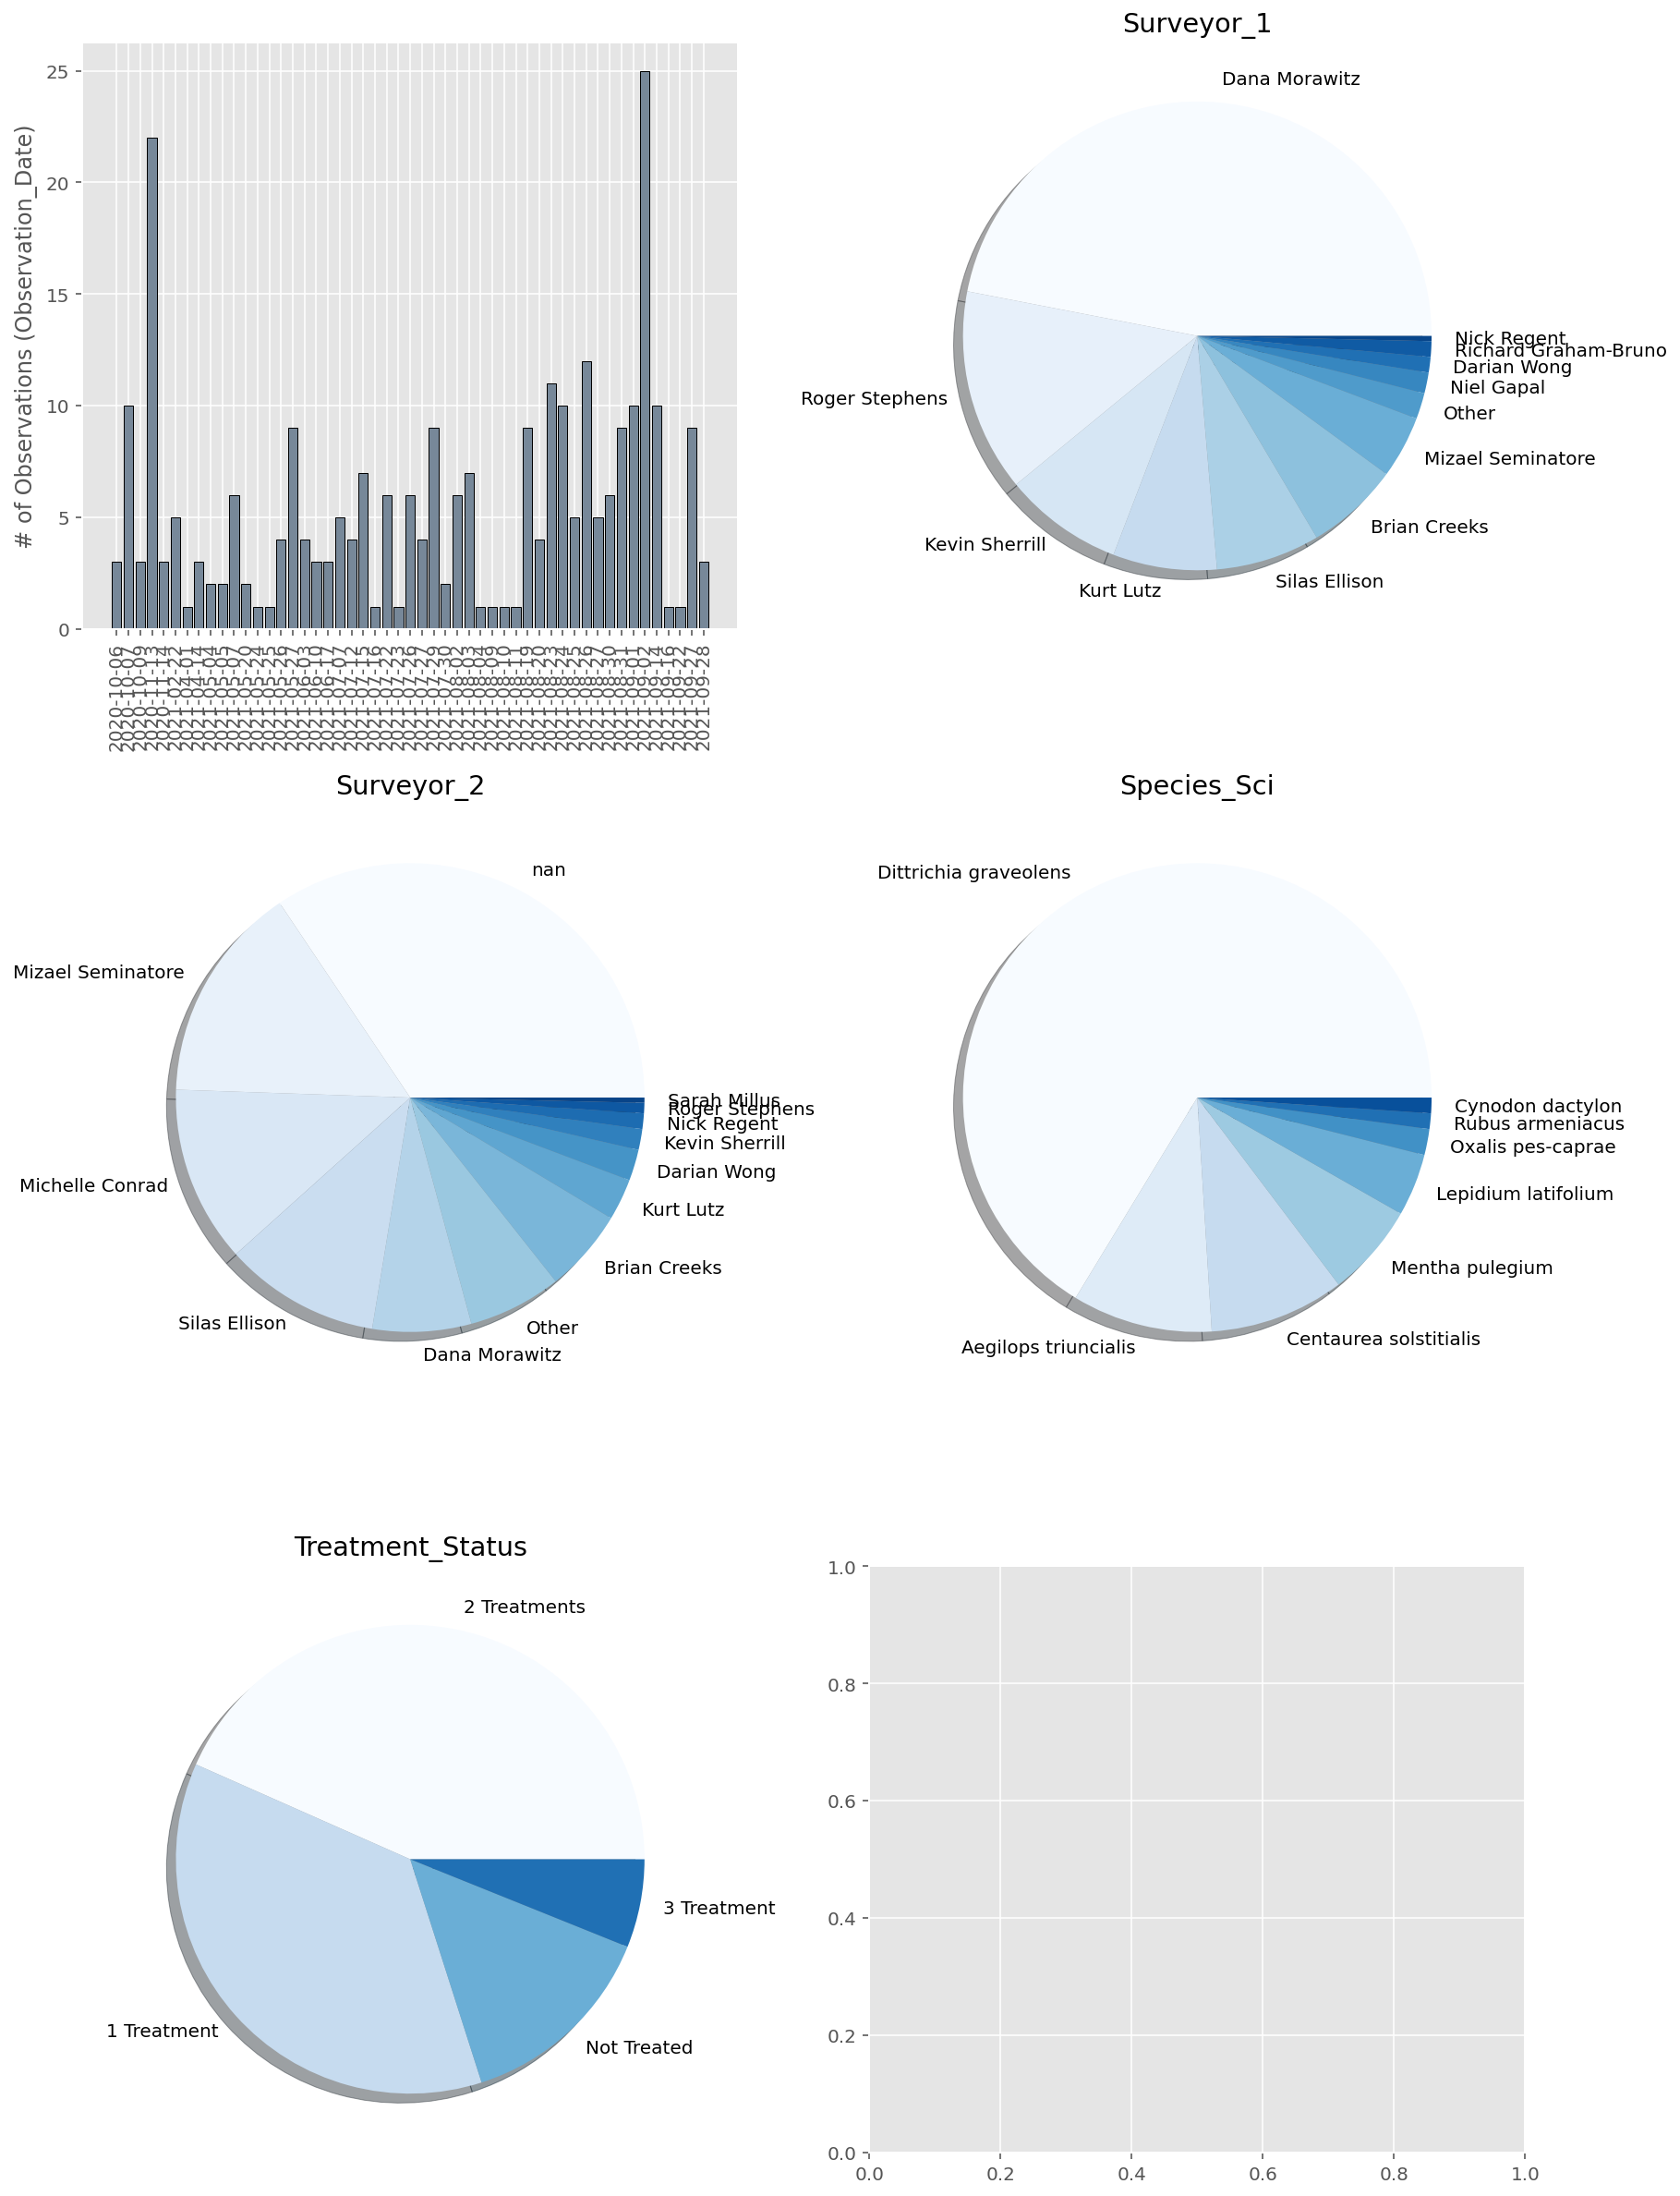

In [29]:
QAQC_plot(sub,cols_to_plot=['Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'Species_Sci','Treatment_Status'])

# Analysis

In [30]:
poly_areas = data.groupby('Habitat').NNIP_Area_Acres.sum()
print('Area of NNIP (Acres)')
print(poly_areas.round(2).to_string())

KeyError: 'Habitat'

In [268]:
habitat_areas

pHab
Central Coast Riparian Scrub      0.429303
Developed                        10.668870
Ephemeral Stream                  0.488558
Intermittent Stream               9.830652
Mixed Riparian Woodland           5.275479
Non-native Grassland            345.620816
Oak Riparian                      5.308198
Oak Savannah                    130.035962
Oak Woodland                     75.585272
Open Water                        1.489329
Potential Stream                  2.493144
Riparian Scrub                    1.457440
Seasonal Wetland                  3.275368
Seep Wetland                      0.038738
Sycamore Riparian                30.501307
Upland Scrub                      9.261535
Wetland Tributary                 1.824066
Willow Riparian                   4.996531
Name: Area_Acres, dtype: float64

In [416]:
poly_pct = (poly_areas / habitat_areas)*100
print('% of habitat that is NNIP polygons')
print(poly_pct.round(2).to_string())

% of habitat that is NNIP polygons
Habitat
Central Coast Riparian Scrub    2.42
Developed                       0.43
Ephemeral Stream                0.31
Intermittent Stream             0.37
Mixed Riparian Woodland         0.33
Non-native Grassland            0.11
Oak Riparian                    2.55
Oak Savannah                    0.06
Oak Woodland                    0.77
Open Water                      0.10
Potential Stream                0.59
Riparian Scrub                  1.77
Seasonal Wetland                1.21
Seep Wetland                    1.33
Sycamore Riparian               0.57
Upland Scrub                    1.20
Wetland Tributary               1.73
Willow Riparian                 1.32


In [418]:
poly_areas_by_spc = data.groupby('Species_Sci').NNIP_Area_Acres.sum()
print('Area of NNIP (cover correction) (Acres)')
print(poly_areas_by_spc.round(3).to_string())

Area of NNIP (cover correction) (Acres)
Species_Sci
Aegilops triuncialis      0.123
Centaurea calcitrapa      0.000
Centaurea solstitialis    0.123
Conium maculatum          0.886
Dittrichia graveolens     0.244
Elymus caput-medusae      0.362
Oxalis pes-caprae         0.003
Rubus armeniacus          0.004


In [420]:
poly_areas_by_spc = data.groupby('Species_Sci').Area_Acres.sum()
print('Area of NNIP Polygons (no cover correction) (Acres)')
print(poly_areas_by_spc.round(3).to_string())

Area of NNIP Polygons (no cover correction) (Acres)
Species_Sci
Aegilops triuncialis      0.344
Centaurea calcitrapa      0.000
Centaurea solstitialis    1.169
Conium maculatum          3.800
Dittrichia graveolens     5.701
Elymus caput-medusae      2.971
Oxalis pes-caprae         0.021
Rubus armeniacus          0.032


# Export data deliverable

<Item title:"NNIP_Polygons_2020_2021" type:Feature Layer Collection owner:Anooshi>
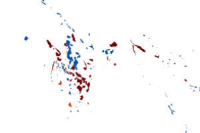

In [3]:
# Re-load data from arcGIS online to export just the polygon data
output = arcGIS_data_load('30a48843bbf54bb99cb9a5641534d0da')

data = output['data0']
feature_service = output['feature_service']

In [4]:
data.head()

,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Species_Sci,GlobalID,Comments,Treatment_Status,Shape__Area,Shape__Length,SHAPE
0,1,2019-12-20 06:22:28,Kevin Sherrill,None,Conium maculatum,c381923f-1067-49d6-ac98-55fefdbe94ff,None,Not Treated,12030.726562,572.171464,"{""rings"": [[[6181826.69819506, 2037455.0669166..."
1,2,2019-12-20 06:35:15,Kevin Sherrill,None,Conium maculatum,7b607c49-b87a-4eab-bdc0-622f87ad2c48,None,1 Treatment,3187.255859,232.131751,"{""rings"": [[[6182006.78891391, 2037170.8569618..."
2,3,2019-12-20 06:42:08,Kevin Sherrill,None,Conium maculatum,643a514b-9653-41ef-af40-d2836df4446a,None,1 Treatment,3073.461914,324.119686,"{""rings"": [[[6182047.64160204, 2037089.5944248..."
3,7,2020-01-09 00:54:26,Mizael Seminatore,Richard Graham-Bruno,Conium maculatum,b5e52935-754e-4c9d-88f8-1b5520da043b,None,Not Treated,678.934570,125.464501,"{""rings"": [[[6181453.54999117, 2037339.0021881..."
4,8,2020-01-09 00:53:55,Richard Graham-Bruno,Mizael Seminatore,Conium maculatum,bf888b85-2451-4a72-99e4-536f06c9d264,None,Not Treated,535.983398,96.175109,"{""rings"": [[[6181485.2621981, 2037270.26872978..."


In [5]:
data.columns

Index(['OBJECTID', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'Species_Sci', 'GlobalID', 'Comments', 'Treatment_Status',
       'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [6]:
# drop and rename columns
data = data.rename(columns={'OBJECTID':'Object ID','GlobalID':'Global ID'})

In [7]:
field_order = [
    'Observation_Date',
    'Surveyor_1',
    'Surveyor_2',
    'Species_Sci',
    'Treatment_Status',
    'Shape__Area',
    'Shape__Length',
    'Comments',
    'Object ID',
    'Global ID',
    'SHAPE'
]

In [8]:
export_data_deliverable(data, feature_service, field_order, file_name='NNIP_Polygons')

No Related Table Found


Exported to Outputs/NNIP_Polygons_Data_20211103.xlsx
